# Project - Bank Marketing

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve

## Train Set File

In [127]:
train_data=pd.read_csv('trainset.csv')

In [5]:
train_data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,41,blue-collar,divorced,basic.4y,yes,no,telephone,may,mon,1575,1,999,nonexistent,5191.0,yes
1,49,entrepreneur,married,university.degree,yes,no,telephone,may,mon,1042,1,999,nonexistent,5191.0,yes
2,49,technician,married,basic.9y,no,no,telephone,may,mon,1467,1,999,nonexistent,5191.0,yes
3,41,technician,married,professional.course,yes,no,telephone,may,mon,579,1,999,nonexistent,5191.0,yes
4,45,blue-collar,married,basic.9y,yes,no,telephone,may,mon,461,1,999,nonexistent,5191.0,yes


#### Check for missing values (nulls)

In [130]:
train_data.isnull().sum()

age            0
job            0
marital        0
education      0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
poutcome       0
nr.employed    0
Subscribed     0
dtype: int64

#### Checking Unknown values in all columns

In [9]:
unknown_values = train_data.apply(lambda col: (col == "unknown").sum())
unknown_values

age               0
job             260
marital          51
education      1227
housing         713
loan            713
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
poutcome          0
nr.employed       0
Subscribed        0
dtype: int64

#### Summarize numeric features

In [134]:
train_data.describe()

,age,duration,campaign,pdays,nr.employed
count,29271.000000,29271.000000,29271.000000,29271.000000,29271.000000
mean,40.126132,266.334973,2.737556,988.235455,5205.364012
std,9.522742,272.826726,3.085469,102.879851,36.306531
min,17.000000,0.000000,1.000000,0.000000,5017.500000
25%,32.000000,103.000000,1.000000,999.000000,5191.000000
50%,39.000000,179.000000,2.000000,999.000000,5228.100000
75%,47.000000,327.000000,3.000000,999.000000,5228.100000
max,88.000000,4918.000000,56.000000,999.000000,5228.100000


#### Analyze unique values for categorical features

In [136]:
categorical_columns = train_data.select_dtypes(include=['object']).columns
categorical_summary = {col: train_data[col].value_counts() for col in categorical_columns}
categorical_summary

{'job': job
 admin.           7313
 blue-collar      6697
 technician       5094
 services         2833
 management       2112
 entrepreneur     1109
 self-employed    1036
 retired           946
 housemaid         853
 unemployed        705
 student           313
 unknown           260
 Name: count, dtype: int64,
 'marital': marital
 married     18387
 single       7469
 divorced     3364
 unknown        51
 Name: count, dtype: int64,
 'education': education
 university.degree      8562
 high.school            6563
 basic.9y               4314
 professional.course    3831
 basic.4y               3070
 basic.6y               1689
 unknown                1227
 illiterate               15
 Name: count, dtype: int64,
 'housing': housing
 yes        14863
 no         13695
 unknown      713
 Name: count, dtype: int64,
 'loan': loan
 no         24149
 yes         4409
 unknown      713
 Name: count, dtype: int64,
 'contact': contact
 cellular     15499
 telephone    13772
 Name: count, dtyp

#### Visualizing relationships in the data to Understand patterns between features and the target variable (Subscribed)

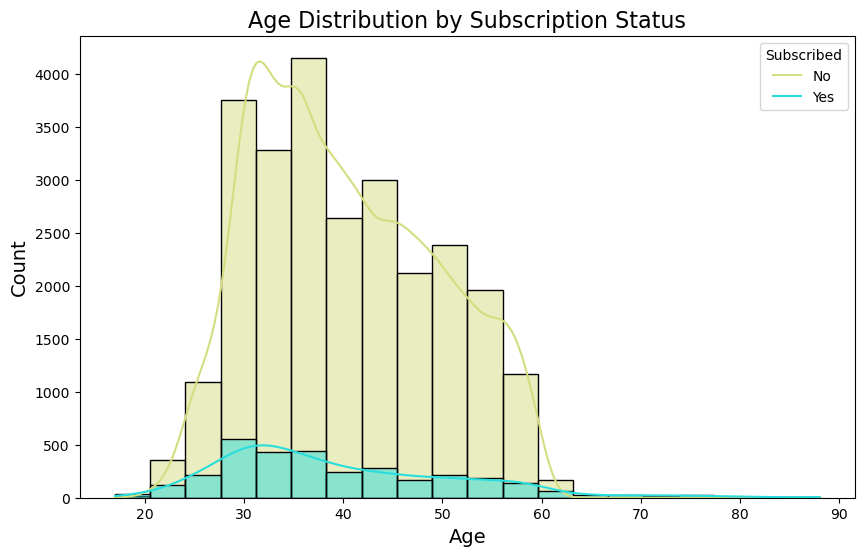

In [16]:
# Histogram for age by subscription status
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='age', hue='Subscribed', bins=20, kde=True, palette="rainbow")
plt.title('Age Distribution by Subscription Status', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

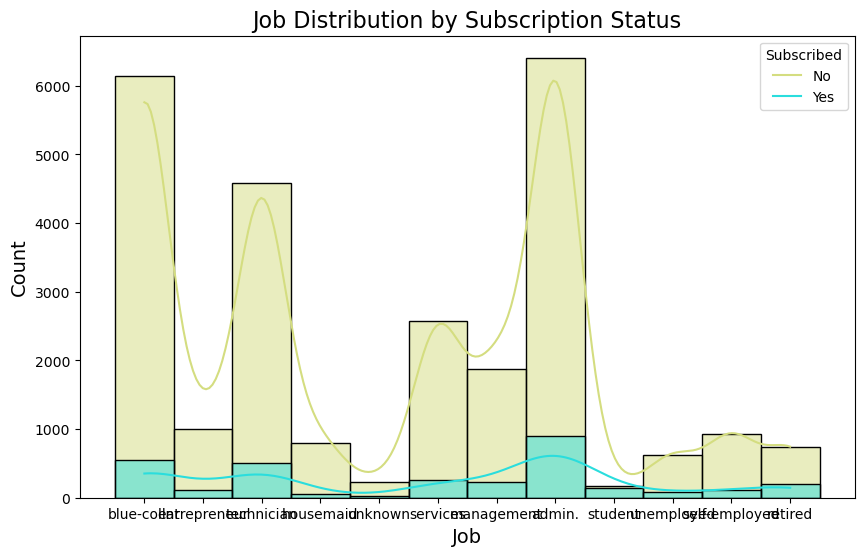

In [18]:
# Histogram for job by subscription status
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='job', hue='Subscribed', bins=20, kde=True, palette="rainbow")
plt.title('Job Distribution by Subscription Status', fontsize=16)
plt.xlabel('Job', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

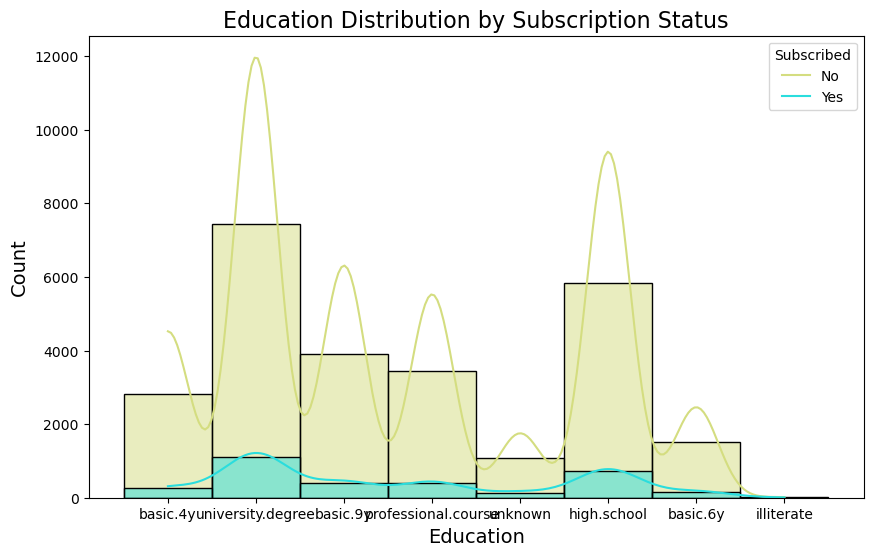

In [20]:
# Histogram for Education by subscription status
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='education', hue='Subscribed', bins=20, kde=True, palette="rainbow")
plt.title('Education Distribution by Subscription Status', fontsize=16)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

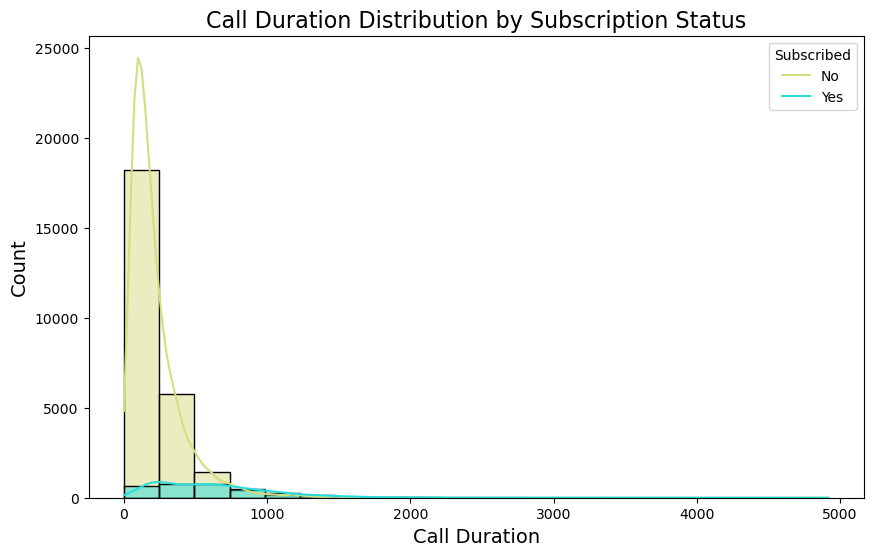

In [22]:
# Histogram for Duration of Call by subscription status
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='duration', hue='Subscribed', bins=20, kde=True, palette="rainbow")
plt.title('Call Duration Distribution by Subscription Status', fontsize=16)
plt.xlabel('Call Duration', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

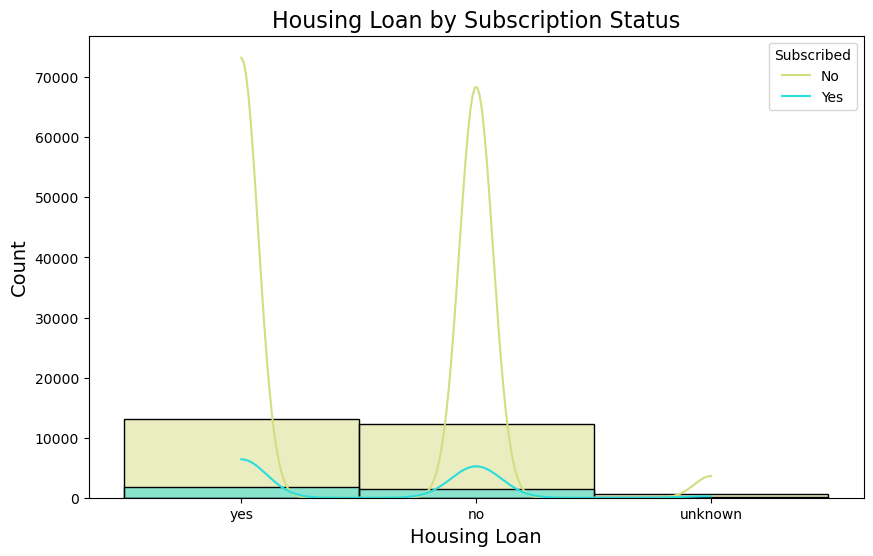

In [24]:
# Histogram for Housing by subscription status
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='housing', hue='Subscribed', bins=20, kde=True, palette="rainbow")
plt.title('Housing Loan by Subscription Status', fontsize=16)
plt.xlabel('Housing Loan', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

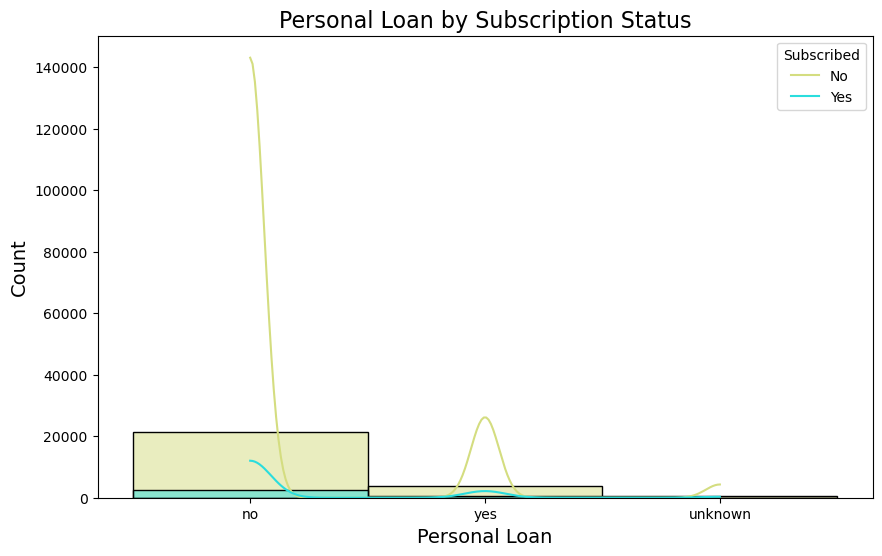

In [26]:
# Histogram for Loan by subscription status
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='loan', hue='Subscribed', bins=20, kde=True, palette="rainbow")
plt.title('Personal Loan by Subscription Status', fontsize=16)
plt.xlabel('Personal Loan', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

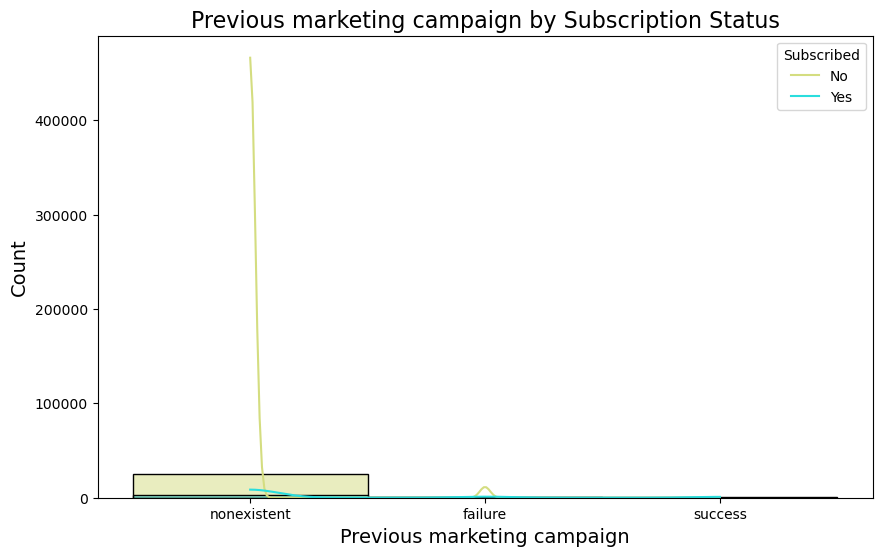

In [28]:
# Histogram for Previous marketing campaign by subscription status
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='poutcome', hue='Subscribed', bins=20, kde=True, palette="rainbow")
plt.title('Previous marketing campaign by Subscription Status', fontsize=16)
plt.xlabel('Previous marketing campaign', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

#### Replacing Unknown values with mode value

In [31]:
train_data.shape

(29271, 15)

In [33]:
unknown_values

age               0
job             260
marital          51
education      1227
housing         713
loan            713
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
poutcome          0
nr.employed       0
Subscribed        0
dtype: int64

In [35]:
unknown_values.sum()

2964

In [37]:
# List of columns that are categorical and need replacement for 'unknown' values
categorical_columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Replace 'unknown' with the mode for each categorical column
for col in categorical_columns:
    mode_value = train_data[col].mode()[0]  # To find the mode (most frequent value)
    print(f"Replacing Unknown values in {col} : with frequent value i.e., {mode_value}")
    train_data[col] = train_data[col].replace('unknown', mode_value)  # Replace 'unknown' with mode

# Check the result
train_data[categorical_columns].head()

Replacing Unknown values in job : with frequent value i.e., admin.
Replacing Unknown values in marital : with frequent value i.e., married
Replacing Unknown values in education : with frequent value i.e., university.degree
Replacing Unknown values in housing : with frequent value i.e., yes
Replacing Unknown values in loan : with frequent value i.e., no
Replacing Unknown values in contact : with frequent value i.e., cellular
Replacing Unknown values in month : with frequent value i.e., may
Replacing Unknown values in day_of_week : with frequent value i.e., thu
Replacing Unknown values in poutcome : with frequent value i.e., nonexistent


,job,marital,education,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,divorced,basic.4y,yes,no,telephone,may,mon,nonexistent
1,entrepreneur,married,university.degree,yes,no,telephone,may,mon,nonexistent
2,technician,married,basic.9y,no,no,telephone,may,mon,nonexistent
3,technician,married,professional.course,yes,no,telephone,may,mon,nonexistent
4,blue-collar,married,basic.9y,yes,no,telephone,may,mon,nonexistent


#### Encoding

##### Why label encoding and what?
Label Encoding for binary categorical features like loan and housing. The values in these columns will be converted in 0/1.

Because, it contains Yes/No

In [40]:
# Ordinal columns converted to numbers using Label Encoding.
label_encoder=LabelEncoder()
train_data['loan'] = label_encoder.fit_transform(train_data['loan'])
train_data['housing'] = label_encoder.fit_transform(train_data['housing'])
train_data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,41,blue-collar,divorced,basic.4y,1,0,telephone,may,mon,1575,1,999,nonexistent,5191.0,yes
1,49,entrepreneur,married,university.degree,1,0,telephone,may,mon,1042,1,999,nonexistent,5191.0,yes
2,49,technician,married,basic.9y,0,0,telephone,may,mon,1467,1,999,nonexistent,5191.0,yes
3,41,technician,married,professional.course,1,0,telephone,may,mon,579,1,999,nonexistent,5191.0,yes
4,45,blue-collar,married,basic.9y,1,0,telephone,may,mon,461,1,999,nonexistent,5191.0,yes


##### One Hot Encoding
If there are more than 2 values in a column, like in Job - we have Admin, technician and so on.

The next line is going to convert these individual values in columns, Like job_admin, job_technician 

In [43]:
train_data_encoded = pd.get_dummies(train_data, columns=['marital','job', 'education', 'month', 'day_of_week', 'poutcome'])
train_data_encoded.head()

,age,housing,loan,contact,duration,campaign,pdays,nr.employed,Subscribed,marital_divorced,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,41,1,0,telephone,1575,1,999,5191.0,yes,True,...,False,False,False,True,False,False,False,False,True,False
1,49,1,0,telephone,1042,1,999,5191.0,yes,False,...,False,False,False,True,False,False,False,False,True,False
2,49,0,0,telephone,1467,1,999,5191.0,yes,False,...,False,False,False,True,False,False,False,False,True,False
3,41,1,0,telephone,579,1,999,5191.0,yes,False,...,False,False,False,True,False,False,False,False,True,False
4,45,1,0,telephone,461,1,999,5191.0,yes,False,...,False,False,False,True,False,False,False,False,True,False


In [45]:
train_data_encoded.columns

Index(['age', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays',
       'nr.employed', 'Subscribed', 'marital_divorced', 'marital_married',
       'marital_single', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

#### Standardizing

##### Feature Scaling: Standardizing Numeric Columns

In [47]:
scaler = StandardScaler()
train_data_scaling = train_data_encoded.copy()
numeric_columns = ['age', 'duration', 'campaign', 'pdays', 'nr.employed']
train_data_scaling[numeric_columns] = scaler.fit_transform(train_data_scaling[numeric_columns])
train_data_scaling

,age,housing,loan,contact,duration,campaign,pdays,nr.employed,Subscribed,marital_divorced,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.091768,1,0,telephone,4.796771,-0.563151,0.104634,-0.395638,yes,True,...,False,False,False,True,False,False,False,False,True,False
1,0.931877,1,0,telephone,2.843117,-0.563151,0.104634,-0.395638,yes,False,...,False,False,False,True,False,False,False,False,True,False
2,0.931877,0,0,telephone,4.400909,-0.563151,0.104634,-0.395638,yes,False,...,False,False,False,True,False,False,False,False,True,False
3,0.091768,1,0,telephone,1.146040,-0.563151,0.104634,-0.395638,yes,False,...,False,False,False,True,False,False,False,False,True,False
4,0.511822,1,0,telephone,0.713524,-0.563151,0.104634,-0.395638,yes,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29266,0.931877,0,0,cellular,0.079411,-0.563151,0.104634,-0.263429,no,False,...,False,False,True,False,False,False,False,True,False,False
29267,-0.643327,1,0,telephone,-0.558367,0.733270,0.104634,-0.263429,no,False,...,False,False,True,False,False,False,False,False,True,False
29268,-1.168395,0,0,cellular,-0.386094,0.085060,0.104634,-0.263429,no,False,...,False,False,True,False,False,False,False,False,True,False
29269,1.771985,0,1,cellular,-0.426413,-0.239046,0.104634,-0.263429,no,False,...,False,False,True,False,False,False,False,False,True,False


#### Converting Binary Values

In [49]:
# Convert 'yes' and 'no' to 1 and 0 in the 'subscribed' column
train_data_scaled = train_data_scaling.copy()
train_data_scaled['Subscribed'] = train_data['Subscribed'].map({'yes': 1, 'no': 0})
train_data_scaled['contact'] = train_data['contact'].map({'cellular': 1, 'telephone': 0})

In [51]:
print(train_data_scaled['Subscribed'].head())
print(train_data_scaled['contact'].head())

0    1
1    1
2    1
3    1
4    1
Name: Subscribed, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: contact, dtype: int64


### Training the dataset for prediction

In [100]:
x=train_data_scaled.drop(columns=['Subscribed'])
y=train_data_scaled.Subscribed

In [102]:
x.head()

,age,housing,loan,contact,duration,campaign,pdays,nr.employed,marital_divorced,marital_married,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.091768,1,0,0,4.796771,-0.563151,0.104634,-0.395638,True,False,...,False,False,False,True,False,False,False,False,True,False
1,0.931877,1,0,0,2.843117,-0.563151,0.104634,-0.395638,False,True,...,False,False,False,True,False,False,False,False,True,False
2,0.931877,0,0,0,4.400909,-0.563151,0.104634,-0.395638,False,True,...,False,False,False,True,False,False,False,False,True,False
3,0.091768,1,0,0,1.146040,-0.563151,0.104634,-0.395638,False,True,...,False,False,False,True,False,False,False,False,True,False
4,0.511822,1,0,0,0.713524,-0.563151,0.104634,-0.395638,False,True,...,False,False,False,True,False,False,False,False,True,False


In [104]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Subscribed, dtype: int64

In [106]:
#Test size = 0.3 indicates 30% of data is used for test and 70% is used for training the data for prediction
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=42)

### Applying Logistic Regression Model

In [63]:
model = LogisticRegression(max_iter=1000)
model.fit(xTrain, yTrain)

LogisticRegression(max_iter=1000)

##### Predicting

In [204]:
yPred = model.predict(xTest)

##### Confusion Matrix And Classification Report

In [207]:
trainSet_Confusion_matrix = confusion_matrix(yTest, yPred)
print("Train Set Confusion Matrix:\n", trainSet_Confusion_matrix)
print("\nTrain Set Classification Report:\n", classification_report(yTest, yPred))

Train Set Confusion Matrix:
 [[7834    6]
 [ 378  564]]

Train Set Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      7840
           1       0.99      0.60      0.75       942

    accuracy                           0.96      8782
   macro avg       0.97      0.80      0.86      8782
weighted avg       0.96      0.96      0.95      8782



##### Plot Confusion Matrix

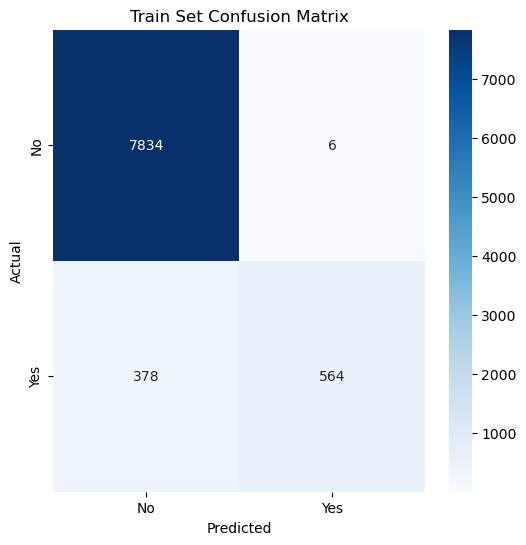

In [197]:
plt.figure(figsize=(6, 6))
sns.heatmap(trainSet_Confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Train Set Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### # Plot ROC Curve

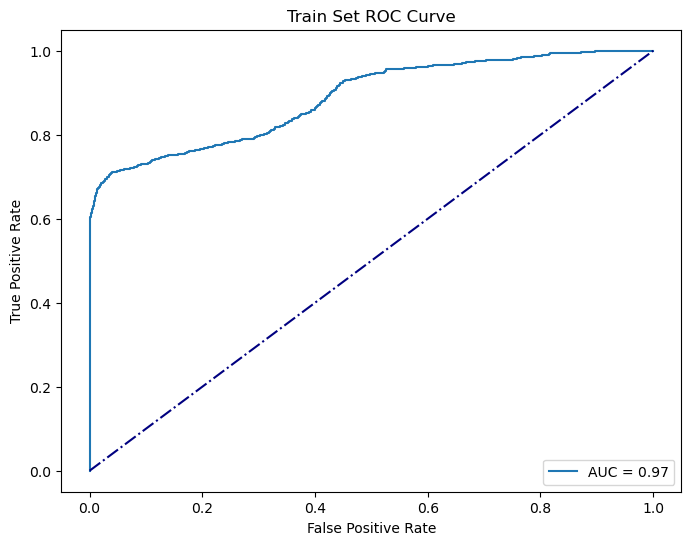

In [156]:
fpr, tpr, thresholds = roc_curve(yTest, model.predict_proba(xTest)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='-.')
plt.title('Train Set ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## Test Set File

In [68]:
# Loading  the dataset
test_data=pd.read_csv('testset.csv')

In [70]:
test_data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,62,retired,married,university.degree,no,no,cellular,oct,fri,717,2,999,nonexistent,5017.5,yes
1,49,admin.,single,high.school,yes,no,cellular,oct,fri,136,2,999,nonexistent,5017.5,yes
2,36,admin.,married,university.degree,no,no,cellular,oct,fri,342,1,999,failure,5017.5,yes
3,70,retired,married,basic.4y,yes,no,cellular,oct,mon,131,1,999,nonexistent,5017.5,yes
4,60,retired,married,basic.4y,no,no,cellular,oct,mon,98,1,999,nonexistent,5017.5,yes


#### Check for missing values (nulls)

In [72]:
# Check for missing values (nulls)
test_data.isnull().sum()

age            0
job            0
marital        0
education      0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
poutcome       0
nr.employed    0
Subscribed     0
dtype: int64

#### Checking Unknown values in all columns

In [74]:
test_unknown_values = test_data.apply(lambda col: (col == "unknown").sum())
test_unknown_values

age              0
job             70
marital         29
education      504
housing        277
loan           277
contact          0
month            0
day_of_week      0
duration         0
campaign         0
pdays            0
poutcome         0
nr.employed      0
Subscribed       0
dtype: int64

#### Summarize numeric features

In [76]:
# Summarize numeric features
test_data.describe()

,age,duration,campaign,pdays,nr.employed
count,11917.000000,11917.000000,11917.000000,11917.000000,11917.000000
mean,39.773349,238.512377,2.150122,899.202736,5072.892934
std,12.350736,221.300798,1.700326,298.530896,48.305972
min,17.000000,0.000000,1.000000,0.000000,4963.600000
25%,31.000000,102.000000,1.000000,999.000000,5023.500000
50%,37.000000,181.000000,2.000000,999.000000,5099.100000
75%,46.000000,305.000000,3.000000,999.000000,5099.100000
max,98.000000,3785.000000,23.000000,999.000000,5195.800000


#### Analyze unique values for categorical features

In [78]:
# Analyze unique values for categorical features
test_categorical_columns = test_data.select_dtypes(include=['object']).columns
test_categorical_summary = {col: test_data[col].value_counts() for col in categorical_columns}
test_categorical_summary

{'job': job
 admin.           3109
 blue-collar      2557
 technician       1649
 services         1136
 management        812
 retired           774
 student           562
 self-employed     385
 entrepreneur      347
 unemployed        309
 housemaid         207
 unknown            70
 Name: count, dtype: int64,
 'marital': marital
 married     6541
 single      4099
 divorced    1248
 unknown       29
 Name: count, dtype: int64,
 'education': education
 university.degree      3606
 high.school            2952
 basic.9y               1731
 professional.course    1412
 basic.4y               1106
 basic.6y                603
 unknown                 504
 illiterate                3
 Name: count, dtype: int64,
 'housing': housing
 yes        6713
 no         4927
 unknown     277
 Name: count, dtype: int64,
 'loan': loan
 no         9801
 yes        1839
 unknown     277
 Name: count, dtype: int64,
 'contact': contact
 cellular     10645
 telephone     1272
 Name: count, dtype: int64,


#### Replacing Unknown values with mode value

In [80]:
test_data.shape

(11917, 15)

In [82]:
test_unknown_values

age              0
job             70
marital         29
education      504
housing        277
loan           277
contact          0
month            0
day_of_week      0
duration         0
campaign         0
pdays            0
poutcome         0
nr.employed      0
Subscribed       0
dtype: int64

In [84]:
test_unknown_values.sum()

1157

In [86]:
# List of columns that are categorical and need replacement for 'unknown' values
testSet_categorical_columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Replace 'unknown' with the mode for each categorical column
for col in testSet_categorical_columns:
    mode_value = test_data[col].mode()[0]  # To find the mode (most frequent value)
    print(f"Replacing Unknown values in {col} : with frequent value i.e., {mode_value}")
    test_data[col] = test_data[col].replace('unknown', mode_value)  # Replace 'unknown' with mode

# Check the result
test_data[testSet_categorical_columns].head()

Replacing Unknown values in job : with frequent value i.e., admin.
Replacing Unknown values in marital : with frequent value i.e., married
Replacing Unknown values in education : with frequent value i.e., university.degree
Replacing Unknown values in housing : with frequent value i.e., yes
Replacing Unknown values in loan : with frequent value i.e., no
Replacing Unknown values in contact : with frequent value i.e., cellular
Replacing Unknown values in month : with frequent value i.e., may
Replacing Unknown values in day_of_week : with frequent value i.e., mon
Replacing Unknown values in poutcome : with frequent value i.e., nonexistent


,job,marital,education,housing,loan,contact,month,day_of_week,poutcome
0,retired,married,university.degree,no,no,cellular,oct,fri,nonexistent
1,admin.,single,high.school,yes,no,cellular,oct,fri,nonexistent
2,admin.,married,university.degree,no,no,cellular,oct,fri,failure
3,retired,married,basic.4y,yes,no,cellular,oct,mon,nonexistent
4,retired,married,basic.4y,no,no,cellular,oct,mon,nonexistent


#### Encoding

##### Label Encoding

In [88]:
# Ordinal columns converted to numbers using Label Encoding.
test_data['loan'] = label_encoder.fit_transform(test_data['loan'])
test_data['housing'] = label_encoder.fit_transform(test_data['housing'])
test_data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,62,retired,married,university.degree,0,0,cellular,oct,fri,717,2,999,nonexistent,5017.5,yes
1,49,admin.,single,high.school,1,0,cellular,oct,fri,136,2,999,nonexistent,5017.5,yes
2,36,admin.,married,university.degree,0,0,cellular,oct,fri,342,1,999,failure,5017.5,yes
3,70,retired,married,basic.4y,1,0,cellular,oct,mon,131,1,999,nonexistent,5017.5,yes
4,60,retired,married,basic.4y,0,0,cellular,oct,mon,98,1,999,nonexistent,5017.5,yes


##### One Hot Encoding

In [90]:
test_data_encoded = pd.get_dummies(test_data, columns=['marital','job', 'education', 'month', 'day_of_week', 'poutcome'])
test_data_encoded.head()

,age,housing,loan,contact,duration,campaign,pdays,nr.employed,Subscribed,marital_divorced,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,62,0,0,cellular,717,2,999,5017.5,yes,False,...,True,False,True,False,False,False,False,False,True,False
1,49,1,0,cellular,136,2,999,5017.5,yes,False,...,True,False,True,False,False,False,False,False,True,False
2,36,0,0,cellular,342,1,999,5017.5,yes,False,...,True,False,True,False,False,False,False,True,False,False
3,70,1,0,cellular,131,1,999,5017.5,yes,False,...,True,False,False,True,False,False,False,False,True,False
4,60,0,0,cellular,98,1,999,5017.5,yes,False,...,True,False,False,True,False,False,False,False,True,False


In [92]:
test_data_encoded.columns

Index(['age', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays',
       'nr.employed', 'Subscribed', 'marital_divorced', 'marital_married',
       'marital_single', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

#### Standardizing

In [94]:
scaler = StandardScaler()
test_data_scaling = test_data_encoded.copy()
numeric_columns = ['age', 'duration', 'campaign', 'pdays', 'nr.employed']
test_data_scaling[numeric_columns] = scaler.fit_transform(test_data_scaling[numeric_columns])
test_data_scaling

,age,housing,loan,contact,duration,campaign,pdays,nr.employed,Subscribed,marital_divorced,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.799697,0,0,cellular,2.162250,-0.088294,0.334309,-1.146758,yes,False,...,True,False,True,False,False,False,False,False,True,False
1,0.747084,1,0,cellular,-0.463246,-0.088294,0.334309,-1.146758,yes,False,...,True,False,True,False,False,False,False,False,True,False
2,-0.305529,0,0,cellular,0.467653,-0.676441,0.334309,-1.146758,yes,False,...,True,False,True,False,False,False,False,True,False,False
3,2.447459,1,0,cellular,-0.485840,-0.676441,0.334309,-1.146758,yes,False,...,True,False,False,True,False,False,False,False,True,False
4,1.637757,0,0,cellular,-0.634965,-0.676441,0.334309,-1.146758,yes,False,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11912,-0.305529,0,0,cellular,0.069987,-0.088294,0.334309,-2.262609,no,False,...,False,False,True,False,False,False,False,False,True,False
11913,-0.872321,1,0,cellular,-0.571700,-0.676441,-2.982070,-2.262609,no,False,...,False,False,True,False,False,False,False,False,False,True
11914,0.504173,0,0,cellular,0.652929,-0.676441,0.334309,-2.262609,no,False,...,False,False,True,False,False,False,False,False,True,False
11915,1.313876,1,0,cellular,-0.223743,-0.088294,0.334309,-2.262609,no,False,...,False,False,True,False,False,False,False,False,True,False


#### Converting Binary Values

In [96]:
# Convert 'yes' and 'no' to 1 and 0 in the 'subscribed' column
test_data_scaled = test_data_scaling.copy()
test_data_scaled['Subscribed'] = test_data['Subscribed'].map({'yes': 1, 'no': 0})
test_data_scaled['contact'] = test_data['contact'].map({'cellular': 1, 'telephone': 0})

In [98]:
print(test_data_scaled['Subscribed'].head())
print(test_data_scaled['contact'].head())

0    1
1    1
2    1
3    1
4    1
Name: Subscribed, dtype: int64
0    1
1    1
2    1
3    1
4    1
Name: contact, dtype: int64


### Training Test set

In [109]:
x_testSet=test_data_scaled.drop(columns=['Subscribed'])
y_testSet=test_data_scaled.Subscribed

In [111]:
#Test size = 0.3 indicates 30% of data is used for test and 70% is used for training the data for prediction
xtestSet_Train, xtestSet_Test, ytestSet_Train, ytestSet_Test = train_test_split(x_testSet, y_testSet, test_size=0.3, random_state=42)

### Applying Logistic Regression Model to TestSet

In [113]:
model.fit(xtestSet_Train, ytestSet_Train)

LogisticRegression(max_iter=1000)

##### Predict on the test set

In [215]:
testSet_yPred = model.predict(xtestSet_Test)

##### Confusion Matrix, Classification Report and AUC - ROC Curve

In [218]:
# Confusion Matrix
testSet_conf_matrix = confusion_matrix(ytestSet_Test, testSet_yPred)

# CLassification Report
testSet_class_report = classification_report(ytestSet_Test, testSet_yPred)

# AUC - ROC Curve
testSet_roc_auc = roc_auc_score(ytestSet_Test, model.predict_proba(xtestSet_Test)[:, 1])

# Display the results
print("Test Set Confusion Matrix:\n", testSet_conf_matrix)
print("\nTest Set Classification Report:\n", testSet_class_report)
print("\nTest Set AUC-ROC Score:", testSet_roc_auc)

Test Set Confusion Matrix:
 [[3038  110]
 [ 151  277]]

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      3148
           1       0.72      0.65      0.68       428

    accuracy                           0.93      3576
   macro avg       0.83      0.81      0.82      3576
weighted avg       0.92      0.93      0.93      3576


Test Set AUC-ROC Score: 0.9658743424099562


##### Ploting Confusion Matrix

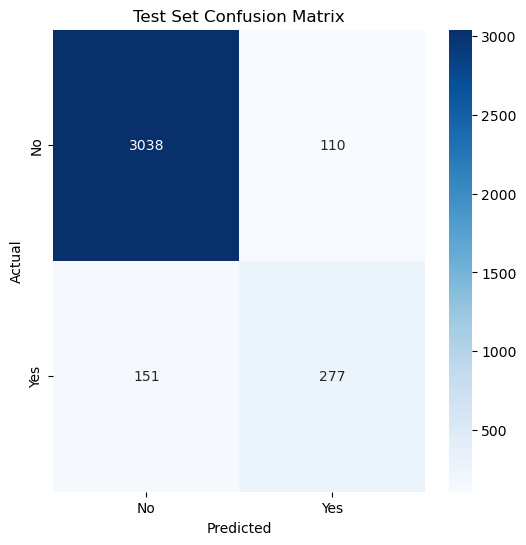

In [222]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(testSet_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Test Set Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Plotting ROC Curve

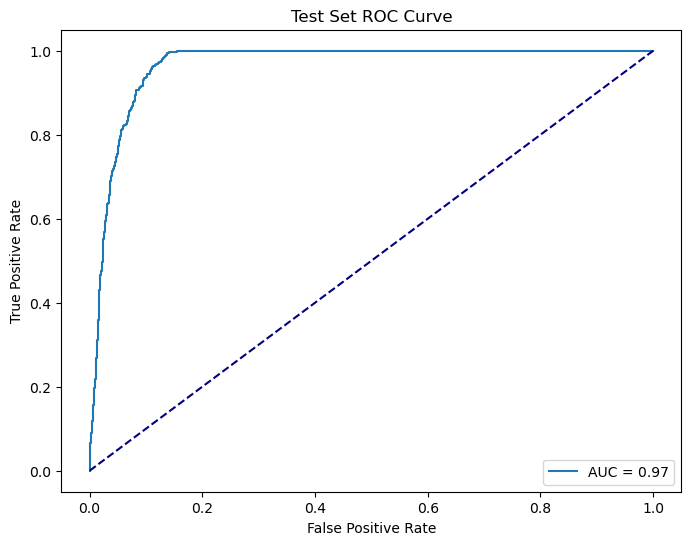

In [225]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(ytestSet_Test, model.predict_proba(xtestSet_Test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('Test Set ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## Analysis Report

In [163]:
print("\nTest Set Classification Report:\n", testSet_class_report)


Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      3148
           1       0.72      0.65      0.68       428

    accuracy                           0.93      3576
   macro avg       0.83      0.81      0.82      3576
weighted avg       0.92      0.93      0.93      3576



In [165]:
print("\nTrain Set Classification Report:\n", classification_report(yTest, yPred))


Train Set Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      7840
           1       0.99      0.60      0.75       942

    accuracy                           0.96      8782
   macro avg       0.97      0.80      0.86      8782
weighted avg       0.96      0.96      0.95      8782

